In [4]:
import pandas as pd
import numpy as np
import random

np.random.seed(1)
random.seed(1)
TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

# Prepare data
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = np.nan
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
df_track_info = pd.read_csv("../../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")

# Sort by ID
df = df.sort_values(by=['ID'])
df= df.reset_index()

df.head(20)

,index,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,...,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7.0,train,...,440.000000,0.601478,D,major,G,major,G,major,G,major
1,1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3.0,train,...,434.193115,0.944516,C,minor,C,minor,C,minor,C,minor
2,2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6.0,train,...,434.193115,0.957651,Bb,major,D,minor,D,minor,D,minor
3,3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2.0,train,...,441.272583,0.796499,G,minor,G,minor,G,minor,G,minor
4,4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7.0,train,...,434.946167,0.860068,A,minor,D,minor,D,minor,D,minor
5,5,1073929880,Đàn Bà,Don Hồ,6515,Song Ngọc,100288,2017-10-01 21:33:00,3.0,train,...,436.960693,0.768609,A,minor,D,minor,A,minor,A,minor
6,6,1073949310,Yêu Một Người Sống Bên Một Người,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,4.0,train,...,442.548920,0.701749,D,minor,A,minor,A,minor,A,minor
7,9078,1073994292,Giấc Mơ Mình Em,Minh Tuyết,455,Minh Vy,100019,2017-11-01 18:27:00,NaN,test,...,441.782684,0.659616,Bb,major,Bb,major,Bb,major,Bb,major
8,7,1073994297,Mất Nhau Trong Đời,Minh Tuyết,455,Huỳnh Nhật Tân,100306,2017-11-01 18:27:00,8.0,train,...,434.193115,0.913990,C,minor,C,minor,C,minor,C,minor
9,8,1073994298,Những Ân Tình Xưa,"Minh Tuyết, Bằng Kiều",455.306,Hoài An,100133,2017-11-01 18:27:00,4.0,train,...,437.971466,0.726335,A,minor,A,minor,A,minor,A,minor


In [31]:
df[df.length==0][["title", "album", "album_artist", "artist_name","genre", "composers_name", "track","release_time","length","label"]]

,title,album,album_artist,artist_name,genre,composers_name,track,release_time,length,label
152,Hương Đồng Gió Nội,0,909,"Bảo Hân, Như Loan, Hương Thủy",12,Song Ngọc,1.0,2017-10-01 21:33:00,0.0,10.0
159,"Liên Khúc : Mưa Rừng, Anh Cho Em Mùa Xuân, Đàn Bà",0,909,Hợp Ca,9,Song Ngọc,1.0,2017-10-01 21:33:00,0.0,5.0
868,Xin Làm Người Xa Lạ,0,909,Lưu Ánh Loan,12,Tú Nhi,1.0,2017-08-08 19:26:00,0.0,3.0
869,Trăng Tàn Trên Hè Phố,0,909,Lưu Ánh Loan,12,Phạm Thế Mỹ,1.0,2017-08-08 19:26:00,0.0,3.0
870,Tấm Ảnh Không Hồn,0,909,Lưu Ánh Loan,12,"Lê Dinh, Hoài An",1.0,2017-08-08 19:26:00,0.0,3.0
871,Quán Nửa Khuya,0,909,Lưu Ánh Loan,12,"Tuấn Khanh, Hoài Linh",1.0,2017-08-08 19:26:00,0.0,4.0
872,Một Người Đi,0,909,Lưu Ánh Loan,12,Mai Châu,1.0,2017-08-08 19:26:00,0.0,3.0
873,Liên Khúc Đừng Nói Xa Nhau,0,909,Lưu Ánh Loan,12,Nhiều Tác Giả,1.0,2017-08-08 19:26:00,0.0,3.0
874,Giọt Buồn Không Tên,0,909,Lưu Ánh Loan,12,Tô Giang,1.0,2017-08-08 19:26:00,0.0,2.0


In [6]:
import seaborn as sns
# Fill nan album
print("There is {} ratio is nan album".format(len(df[df["album"].isnull()])/len(df)))
df["album"]  = df["album"].fillna("")
df["len_album_name"] = df["album"].apply(lambda x: len(x.split(" ")))
df["isRemixAlbum"] = [ 1 if "Remix" in t else 0 for t in df["album"]]
df["isOSTAlbum"] = [ 1 if "OST" in t else 0 for t in df["album"]]
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]
df["isBeatAlbum"] = [ 1 if "Beat" in t else 0 for t in df["album"]]
df["isTopHitAlbum"] = [ 1 if "Top Hits" in t else 0 for t in df["album"]]
df["isCoverAlbum"] = [ 1 if "Cover" in t else 0 for t in df["album"]]
df["isEPAlbum"] = [ 1 if "EP" in t else 0 for t in df["album"]]
df["isLienKhucAlbum"] = [ 1 if "Liên Khúc" in t else 0 for t in df["album"]]

def no_bracket(tit):
    return tit.split('(')[0]

df['no_bracket_title'] = df.title.apply(lambda x: no_bracket(x))
df["num_same_title_no_bracket"] = df.groupby("no_bracket_title")["no_bracket_title"].transform("count")
df['no_bracket_title_cat'] = df['no_bracket_title'].astype('category').cat.codes

df["isEDM"] = [ 1 if "EDM" in t else 0 for t in df["title"]]
df["isDJ"] = [ 1 if "DJ" in t else 0 for t in df["title"]]
df["isMix"] = [ 1 if "Mix" in t else 0 for t in df["title"]]
df["isLive"] = [ 1 if "Live" in t else 0 for t in df["title"]]

df["num_same_title"] = df.groupby("title")["title"].transform("count")
df["title_cat"] = df["title"].astype('category').cat.codes
df["album_name_is_title_name"]= [1 if r.title in r.album  else 0 for i,r in df.iterrows() ]
df["album"] = df["album"].astype('category')
df["album"] =  df["album"].cat.codes

df["artist_name_cat"] = df["artist_name"].astype('category')
df["artist_name_cat"] =  df["artist_name_cat"].cat.codes
df["composers_name_cat"] = df["composers_name"].astype('category')
df["composers_name_cat"] =  df["composers_name_cat"].cat.codes
df["copyright_cat"] = df["copyright"].astype('category')
df["copyright_cat"] =  df["copyright_cat"].cat.codes

import re
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes

df["composers_id_min"]=  df["composers_id"].apply(lambda x: get_min_artist_id(x))
df["composers_id_min_cat"] = df["composers_id_min"].astype('category')
df["composers_id_min_cat"] =  df["composers_id_min_cat"].cat.codes

df["artist_id_max"]=  df["artist_id"].apply(lambda x: get_max_artist_id(x))
df["artist_id_max_cat"] = df["artist_id_max"].astype('category')
df["artist_id_max_cat"] =  df["artist_id_max_cat"].cat.codes

df["composers_id_max"]=  df["composers_id"].apply(lambda x: get_max_artist_id(x))
df["composers_id_max_cat"] = df["composers_id_max"].astype('category')
df["composers_id_max_cat"] =  df["composers_id_max_cat"].cat.codes

#New feature
# df["group_album_artist_id_min_cat"] = df.groupby(["album","artist_id_min_cat"]).ngroup()
# df["group_album_artist_id_min_cat"] = df["group_album_artist_id_min_cat"].astype("category").cat.codes
# df["group_album_artist_id_max_cat"] = df.groupby(["album","artist_id_max_cat"]).ngroup()
# df["group_album_artist_id_max_cat"] = df["group_album_artist_id_max_cat"].astype("category").cat.codes


# Fill genre
print("There is {} ratio is nan genre".format(len(df[df["genre"].isnull()])/len(df)))
df["genre"]  = df["genre"].fillna("No genre")
df["genre"] = df["genre"].astype('category')
df["genre"] =  df["genre"].cat.codes

# Fill album_artist
print("There is {} ratio is nan album_artist".format(len(df[df["album_artist"].isnull()])/len(df)))
df["album_artist"]  = df["album_artist"].fillna("No album_artist")
df["album_artist_contain_artistname"]= [1 if r.album_artist in r.artist_name  else 0 for i,r in df.iterrows() ]
df["album_artist"] = df["album_artist"].astype('category')
df["album_artist"] =  df["album_artist"].cat.codes

# Fill track
print("There is {} ratio is nan track".format(len(df[df["track"].isnull()])/len(df)))
df["track"]  = df["track"].fillna("(1, 1)")
df["istrack11"] = df["track"] == "(1, 1)"
def tracknum_to_value(track_num):
    try:
        
        track_num = make_tuple(track_num)
        if track_num[0] is not None:
            return float(track_num[0]) / float(track_num[1])
        else:
            return 1.0
    except:
        return 1.0

df["track"] = df["track"].apply(lambda t: tracknum_to_value(t))


# Fill lyric
print("There is {} ratio is nan lyric".format(len(df[df["lyric"].isnull()])/len(df)))
df["lyric"]  = df["lyric"].fillna("")
df["islyric"] = df["lyric"].apply(lambda x:  True if len(x)  else False)
df["num_line_lyric"] = df["lyric"].apply(lambda x : len(x.split("\r")))


#--------------------------------------------------------
from dateutil import relativedelta
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval as make_tuple
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))
df["freq_artist"] = df.groupby('artist_id')['artist_id'].transform('count').astype('float')
df["freq_composer"] = df.groupby('composers_id')['composers_id'].transform('count').astype('float')
df["freq_artist_min"] = df.groupby('artist_id_min_cat')['artist_id_min_cat'].transform('count').astype('float')
df["freq_composer_min"] = df.groupby('composers_id_min_cat')['composers_id_min_cat'].transform('count').astype('float')

df["num_album_per_min_artist"] = df.groupby(['artist_id_min_cat','album'])['album'].transform('count').astype('float')
df["num_album_per_min_composer"] = df.groupby(['composers_id_min','album'])['album'].transform('count').astype('float')


df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["weekday"] = df["datetime"].dt.weekday
from datetime import date 
import holidays 

in_holidays = holidays.HolidayBase() 
for i in range(26,32):
    in_holidays.append(str(i)+'-01-2017')
in_holidays.append('01-02-2017')
for i in range(14,21):
    in_holidays.append(str(i)+'-02-2018')
in_holidays.append('30-04-2017')
in_holidays.append('30-04-2018')
in_holidays.append('01-01-2017')
in_holidays.append('01-01-2018')
in_holidays.append('14-02-2017')
in_holidays.append('14-02-2018')
in_holidays.append('08-03-2017')
in_holidays.append('08-03-2018')
in_holidays.append('01-05-2017')
in_holidays.append('01-05-2018')
in_holidays.append('06-04-2017')
in_holidays.append('25-04-2018')
in_holidays.append('01-06-2017')
in_holidays.append('01-06-2018')
in_holidays.append('04-10-2017')
in_holidays.append('24-09-2018')
in_holidays.append('20-10-2017')
in_holidays.append('20-10-2018')
in_holidays.append('20-11-2017')
in_holidays.append('20-11-2018')
in_holidays.append('24-12-2017')
in_holidays.append('24-12-2018')
df['isHoliday'] = df.release_time.apply(lambda x: x in in_holidays)



df["len_of_songname"] = df["title"].apply(lambda x: len(x.split(" ")))
df["isRemix"] = [ 1 if "Remix" in t else 0 for t in df["title"]]
df["isOST"] = [ 1 if "OST" in t else 0 for t in df["title"]]
df["isBeat"] = [ 1 if "Beat" in t else 0 for t in df["title"]]
df["isVersion"] = [ 1 if "Version" in t else 0 for t in df["title"]]
df["isCover"] = [ 1 if "Cover" in t else 0 for t in df["title"]]
df["isLienKhuc"] = [ 1 if "Liên Khúc" in t else 0 for t in df["title"]]



def find_num_song_release_in_final_month(df, day):
    month5th = day + relativedelta.relativedelta(months=5)
    month6th = day + relativedelta.relativedelta(months=6)  
    return len(df.datetime[(df.datetime >= month5th)&(df.datetime<=month6th)])



df["num_song_release_in_final_month"] = df.datetime.apply(lambda d:find_num_song_release_in_final_month(df ,d))

#It seems like all songs on albums release at the same time, so groupby by release_time will create album 
df["album_right"] = df.groupby(df.release_time).ngroup().astype("category").cat.codes
df["day_release"] = df.groupby(["year","dayofyear"]).ngroup().astype("category").cat.codes
df["numsongInAlbum"] = df.groupby("album_right")["album_right"].transform("count")
df["isSingleAlbum_onesong"]= df["isSingleAlbum"] & (df["numsongInAlbum"]==1)

# Remove len =0
df = df[(df.length>0) | (df.num_same_title==1)]

There is 0.0 ratio is nan album
There is 0.0017653981953707335 ratio is nan genre
There is 0.24038838760298156 ratio is nan album_artist
There is 0.0007846214201647705 ratio is nan track
There is 0.6722244017261672 ratio is nan lyric


In [38]:
df[(df.length==0) & (df.num_same_title==1)]

,index,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,...,isOST,isBeat,isVersion,isCover,isLienKhuc,num_song_release_in_final_month,album_right,day_release,numsongInAlbum,isSingleAlbum_onesong
159,135,1075811002,"Liên Khúc : Mưa Rừng, Anh Cho Em Mùa Xuân, Đàn Bà",Hợp Ca,29668,Song Ngọc,100288,2017-10-01 21:33:00,5.0,train,...,0,0,0,0,1,628,490,62,18,False
873,771,1076340543,Liên Khúc Đừng Nói Xa Nhau,Lưu Ánh Loan,5494,Nhiều Tác Giả,101740,2017-08-08 19:26:00,3.0,train,...,0,0,0,0,1,738,71,8,7,False


In [7]:
from datetime import datetime
import re

def split_id(s):
    return re.split(',|\.',s)

m = df.artist_id.unique()
idx_lst = []
for idx in m:
    ps = split_id(idx)
    for i in ps:
        idx_lst.append(i)
        
id_lst = list(set(idx_lst))

def condition(df, artist_id):
    r = df.artist_id.apply(lambda x: artist_id in split_id(x))
    return r

df_train = df[df.dataset=="train"]
data= [df_train[condition(df_train, artist_id)].label.agg(["mean","std","count"]) for artist_id in id_lst]
new_df = pd.DataFrame(data=data)
new_df["artist_id"] =  id_lst

new_df.dropna(inplace=True)
new_df.set_index('artist_id', inplace=True)
art_dict = new_df.to_dict()

def best_count_id(values):
    ids = split_id(values)
    temp_mean = 0
    temp_id = str(min([int(a) for a in ids]))
    for id in ids:
        try:
            if art_dict['count'][id] > temp_mean:
                temp_mean = art_dict['count'][id]
                temp_id = id
        except:
            temp_mean = temp_mean
            temp_id = temp_id
    return temp_id
    
df['artist_count_id'] = df['artist_id'].apply(best_count_id)

def best_mean_id(values):
    ids = split_id(values)
    temp_mean = 10
    temp_id = str(min([int(a) for a in ids]))
    for id in ids:
        try:
            if art_dict['mean'][id] < temp_mean:
                temp_mean = art_dict['mean'][id]
                temp_id = id
        except:
            temp_mean = temp_mean
            temp_id = temp_id
    return temp_id

df['artist_mean_id'] = df['artist_id'].apply(best_mean_id)

def best_std_id(values):
    ids = split_id(values)
    temp_std = 10
    temp_id = str(min([int(a) for a in ids]))
    for id in ids:
        try:
            if art_dict['std'][id] < temp_std:
                temp_std = art_dict['std'][id]
                temp_id = id
        except:
            temp_std = temp_std
            temp_id = temp_id
    return temp_id

df['artist_std_id'] = df['artist_id'].apply(best_std_id)

df['artist_mean_id'] = df['artist_mean_id'].astype('category')
df['artist_std_id'] = df['artist_std_id'].astype('category')
df['artist_count_id'] = df['artist_count_id'].astype('category')

/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [9]:
from functools import reduce

def create_album_score_lookup_table(df):
    data = df.groupby('album_right').label.agg(["mean","std","count"])
    return data

def create_artist_score_lookup_table(df):
    def split_id(s):
        return re.split(',|\.',s)
    
    def mask_row_contain_artist_id(df, artist_id):
        r = df.artist_id.apply(lambda x: artist_id in split_id(x))
        return r
    
    # Get all artist ids
    artist_group = df.artist_id.unique()
    artist_ids = reduce(lambda l,e: l+split_id(e), artist_group, [])
    artist_ids = list(set(artist_ids))
    # Get data
    data= [df[mask_row_contain_artist_id(df, artist_id)].label.agg(["mean","std","count", "median"]) 
                                                        for artist_id in artist_ids]
    new_df = pd.DataFrame(data=data)
    new_df["artist_id"] =  artist_ids
    return new_df.set_index("artist_id")
    




In [24]:
def get_field_by_key(table, k, field="mean"):
    if k in table.index:
        return table.loc[k][field]
    return np.nan

def get_value_by_key(table, k):
    if k in table.index:
        return table.loc[k], False
    return np.nan, True

def assign_value(album_table, artist_table, r):
    d1,isnul1 = get_value_by_key(album_table, r.album_right)
    d2,isnul2 = get_value_by_key(artist_table, r.artist_id_min_cat)
#     print(type(d2),isnul2)
    if isnul1 and isnul2:
        return np.nan
    elif isnul1 and d2["std"] <2:
        return d2["mean"]
    elif isnul2 and d1["std"] <2:
        return d1["mean"]
    
    elif not isnul1 and d1["std"] <2 and not isnul2 and d2["std"] < 2:
        return d1["mean"] 
    
    
    return np.nan

def assign_value_album(album_table, r):
    d1,isnul1 = get_value_by_key(album_table, r.album_right)
    
    if not isnul1 and d1["std"] <1.75:
        return d1["std"]
    +
    return np.nan
    
def assign_value_artist(artist_table, r):
    d1,isnul1 = get_value_by_key(artist_table, r.artist_id_min_cat)
    
    if not isnul1 and d1["std"] <1.75:
        return d1["std"]
    
    return np.nan
    

SyntaxError: invalid syntax (<ipython-input-24-d6c0c159374d>, line 33)

In [27]:
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from math import sqrt

from sklearn.model_selection import train_test_split

# chosen_features = ["album_right", "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", 
#                    "numsongInAlbum","isSingleAlbum_onesong" ]

chosen_features = [ "album_right", "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "isCoverAlbum", "artist_id_cat","composers_id_cat","copyright_cat" ,
                  "artist_id_min_cat",  "artist_id_max_cat","composers_id_min_cat",
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday",
                  "num_album_per_min_artist", "num_album_per_min_composer", 
                   "numsongInAlbum","isSingleAlbum_onesong","artist_mean_id", "artist_std_id" ,"artist_count_id" , "title_cat"]

# chosen_features = [  "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum","copyright_cat" ,
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", 
#                    "numsongInAlbum","isSingleAlbum_onesong"]

# chosen_features = ["isRemix", "isOST", "isBeat", "isVersion", "isCover",  "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer"]
# chosen_features  += ["predicted_label"]
# chosen_features += ["mean_album_score", "mean_artist_min_score"]
df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]



folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
# fig, axes = plt.subplots(5, 1, figsize=(10, 10*5))
# axes = axes.flat
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    
    # Create lookup table
    album_lookup_table = create_album_score_lookup_table(df_train.iloc[trn_idx])
    artist_lookup_table = create_artist_score_lookup_table(df_train.iloc[trn_idx])
    
#     df_train["mean_album_score"]= [assign_value_album(album_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_artist_min_score"]= [assign_value_artist(artist_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_album_score"] = df_train["mean_album_score"].fillna(0)
#     df_train["mean_artist_min_score"] = df_train["mean_artist_min_score"].fillna(0)
    
    df_train["predicted_label"] = [assign_value(album_lookup_table,artist_lookup_table, r) for i, r in df_train.iterrows()]
    df_train["predicted_label"] =df_train["predicted_label"].fillna(0)
    
    mlp = MLPRegressor(verbose=True,early_stopping=True)

    mlp.fit(df_train.iloc[trn_idx][chosen_features].values,labels.iloc[trn_idx])
    oof[val_idx] = mlp.predict(df_train.iloc[val_idx][chosen_features].values)
    print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(labels.iloc[val_idx], oof[val_idx]))))
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits



Fold 0


KeyboardInterrupt: 

5.5

In [25]:


import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

chosen_features = ["album_right", "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
                  "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
                  "num_album_per_min_artist", "num_album_per_min_composer", 
                   "numsongInAlbum","isSingleAlbum_onesong","artist_mean_id",
                   "artist_std_id" ,"artist_count_id","title_cat","num_same_title"]

# chosen_features = ["album_right","freq_artist",  "day", 
#                      "isBeat",  "num_song_release_in_final_month",
#                   "length","album_artist",
#                   "artist_name_cat","composers_name_cat",
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min","dayofyear", 
#                    "numsongInAlbum","artist_mean_id","artist_std_id" ,"artist_count_id" ]


# chosen_features = [  "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum","copyright_cat" ,
#                   "composers_id_min_cat",
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", 
#                    "numsongInAlbum","isSingleAlbum_onesong","artist_mean_id", "artist_std_id" ,"artist_count_id"]

# chosen_features  += ["predicted_label"]
chosen_features += ["mean_album_score", "mean_artist_min_score"]
df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]

param = {
    'bagging_freq': 20,          
    'bagging_fraction': 0.95,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.1,     'learning_rate': 0.001,
    'max_depth': -1,             'metric':'root_mean_squared_error', 'min_data_in_leaf': 5,   
       'num_leaves': 50,            
    'num_threads': 8,              'tree_learner': 'serial',   'objective': 'regression',
    'reg_alpha': 0.1002650970728192, 'reg_lambda': 0.1003427518866501,'verbosity': 1,
    "seed": 99999,
    "use_missing":True
}

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
# fig, axes = plt.subplots(5, 1, figsize=(10, 10*5))
# axes = axes.flat
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    
    # Create lookup table
    album_lookup_table = create_album_score_lookup_table(df_train.iloc[trn_idx])
    artist_lookup_table = create_artist_score_lookup_table(df_train.iloc[trn_idx])
    
    df_train["mean_album_score"]= [assign_value_album(album_lookup_table, r) for i, r in df_train.iterrows()]
    df_train["mean_artist_min_score"]= [assign_value_artist(artist_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_album_score"] = df_train["mean_album_score"].fillna(0)
#     df_train["mean_artist_min_score"] = df_train["mean_artist_min_score"].fillna(0)
    
    
    df_train["predicted_label"] = [assign_value(album_lookup_table,artist_lookup_table, r) for i, r in df_train.iterrows()]
    
    print("Percentage null in valid:", len(np.sum(df_train.iloc[val_idx].isnull())) / len(df_train.iloc[val_idx]))
#     df_train["predicted_label"] = df_train["predicted_label"].fillna(99999)
    df_test["predicted_label"] = [assign_value(album_lookup_table,artist_lookup_table, r) for i, r in df_test.iterrows()]
    print("Percentage null in test:", len(np.sum(df_test.isnull())) / len(df_test))
#     df_test["predicted_label"] = df_test["predicted_label"].fillna(99999)
    
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][chosen_features], label=labels.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][chosen_features], label=labels.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 20000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits



Fold 0


/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Percentage null in valid: 0.22478070175438597


/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Percentage null in test: 0.1815742397137746
Training until validation scores don't improve for 20000 rounds
[5000]	training's rmse: 1.65308	valid_1's rmse: 1.87154
[10000]	training's rmse: 1.34459	valid_1's rmse: 1.72623
[15000]	training's rmse: 1.16675	valid_1's rmse: 1.66528
[20000]	training's rmse: 1.03834	valid_1's rmse: 1.62999
[25000]	training's rmse: 0.939789	valid_1's rmse: 1.60842
[30000]	training's rmse: 0.861426	valid_1's rmse: 1.5942
[35000]	training's rmse: 0.795497	valid_1's rmse: 1.58424
[40000]	training's rmse: 0.739369	valid_1's rmse: 1.57627
[45000]	training's rmse: 0.690831	valid_1's rmse: 1.57069
[50000]	training's rmse: 0.647247	valid_1's rmse: 1.56628
[55000]	training's rmse: 0.608809	valid_1's rmse: 1.56312
[60000]	training's rmse: 0.573878	valid_1's rmse: 1.56018
[65000]	training's rmse: 0.542427	valid_1's rmse: 1.55826
[70000]	training's rmse: 0.513841	valid_1's rmse: 1.55631
[75000]	training's rmse: 0.487766	valid_1's rmse: 1.55549
[80000]	training's rmse: 0.4

KeyError: "['mean_album_score', 'mean_artist_min_score'] not in index"

In [45]:
from math import sqrt

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, oof))))
sub = pd.DataFrame({"ID": df_test.ID.values})
sub["label"] = predictions
sub.to_csv("submission_lightgbm.csv", index=False, header=False)

RMSE: 1.55497 


<Figure size 2160x2160 with 0 Axes>

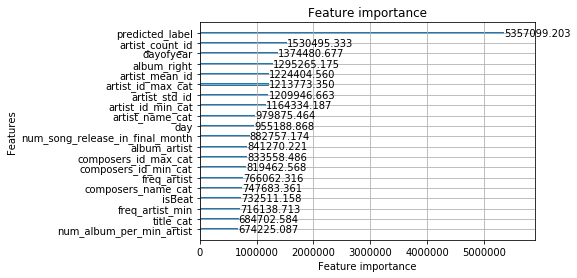

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
lgb.plot_importance(clf, max_num_features=20,importance_type='gain')


In [38]:
# chosen_features = ["album_right","freq_artist",  "day", 
#                      "isBeat",  "num_song_release_in_final_month",
#                   "length","album_artist",
#                   "artist_name_cat","composers_name_cat",
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min","dayofyear", 
#                    "numsongInAlbum","artist_mean_id","artist_std_id" ,"artist_count_id" ]


19